In [1]:
#imports libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

The MNIST data was loaded with 60000 training samples and 10000 testing samples.
Each sample is a 28 x 28 pixel image.


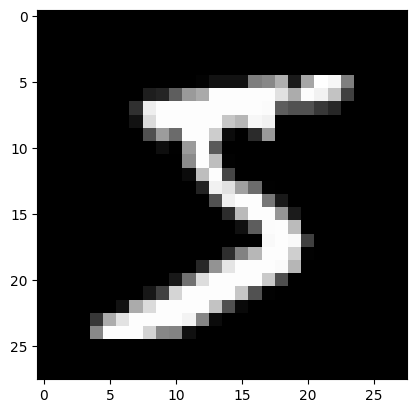

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
s1 = x_train.shape
s2 = x_test.shape
print(f"The MNIST data was loaded with {s1[0]} training samples and {s2[0]} testing samples.")
print(f"Each sample is a {s1[1]} x {s1[2]} pixel image.")

_ = plt.imshow(example, cmap="gray")

### Basic CNN
This is a basic CNN with a somewhat arbitrary number of dense and dropout layers. This is what appears to be most successful after some basic testing. The input layer obviously takes the shape of the image(28 by 28). Relu seemed to be the best activation fuction after some testing. Softmax is used for the final output layer, since we are trying to get a probabiliy distriubtion function for multiple discrete possible classifications (0-9).

In [7]:
# Theres a better way to do this, but I'm doing it manually for testing purposes

ff_layers = []
ff_layers.append(Input(shape=(28,28,1)))
ff_layers.append(Flatten())
ff_layers.append(Dense(25, activation=tf.nn.relu))
ff_layers.append(Dropout(rate=0.2))
ff_layers.append(Dense(25, activation=tf.nn.relu))
ff_layers.append(Dropout(rate=0.2))
ff_layers.append(Dense(10, activation=tf.nn.softmax))

ff_model = Sequential(ff_layers)
ff_model.compile()


ff_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 25)                19625     
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
Total params: 20535 (80.21 KB)
Trainable params: 20535 (

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.7579 - accuracy: 0.1698 - val_loss: 1.7984 - val_accuracy: 0.3471
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7994 - accuracy: 0.3198 - val_loss: 1.4329 - val_accuracy: 0.4663
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4914 - accuracy: 0.4381 - val_loss: 1.1363 - val_accuracy: 0.5996
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3853 - accuracy: 0.4853 - val_loss: 1.0512 - val_accuracy: 0.6161
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3046 - accuracy: 0.5202 - val_loss: 0.9324 - val_accuracy: 0.6686
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2599 - accuracy: 0.5372 - val_loss: 0.9569 - val_accuracy: 0.6692
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2145 - accuracy: 0.5589 - val_loss: 0.8428 - val_accuracy:

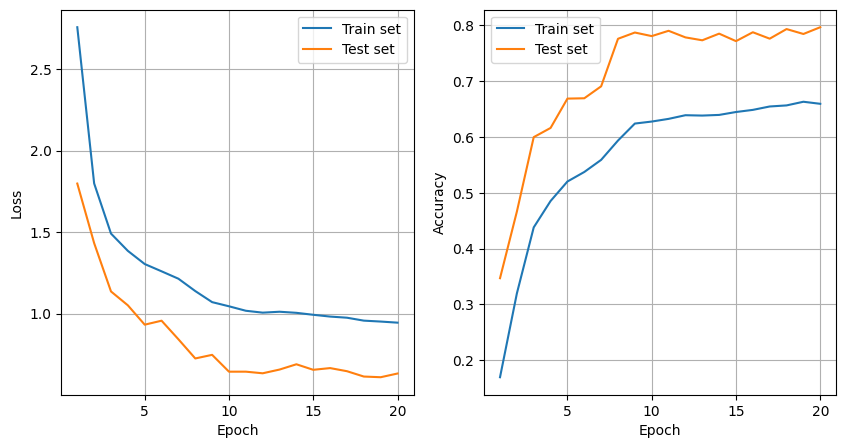

In [8]:
ff_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
n_epochs = 20
history = ff_model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_loss'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_epochs+1), history.history['accuracy'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_accuracy'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

print(f"\nAccuracy on the final epoch of training was {100*history.history['accuracy'][-1]:0.2f}%")

In [9]:
# CNN accuracy on test set
ff_scores = ff_model.evaluate(x_test, y_test)

print(f"\nThe fully-connected feedforward model achieves an accuracy of {ff_scores[1]*100:.2f}% on the test data.")

313/313 [==============================] - 0s 971us/step - loss: 0.6327 - accuracy: 0.7964

The fully-connected feedforward model achieves an accuracy of 79.64% on the test data.
